In [211]:
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [212]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [213]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2022-12-03 14:49:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.203.128, 142.250.97.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.03s   

2022-12-03 14:49:08 (157 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [214]:
with open('/tmp/sarcasm.json', 'r') as f:
  dataset=json.load(f)

In [215]:
import numpy as np

In [216]:
len(dataset)

26709

In [217]:
dataset

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [218]:
sentences=[]
labels=[]

In [219]:
for item in dataset:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])


In [220]:
len(labels)

26709

In [221]:
training_sent=sentences[:training_size]
testing_sent=sentences[training_size:]
trainig_label= labels[:training_size]
testing_label= labels[training_size:]

In [222]:
len(testing_label)

6709

In [223]:
tokenizer= Tokenizer(num_words=vocab_size, oov_token=oov_tok )
tokenizer.fit_on_texts(training_sent)

In [224]:
word_index= tokenizer.word_index

In [225]:
word_index

{'<OOV>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'from': 15,
 'at': 16,
 'about': 17,
 'you': 18,
 'by': 19,
 'this': 20,
 'after': 21,
 'be': 22,
 'up': 23,
 'out': 24,
 'that': 25,
 'how': 26,
 'as': 27,
 'it': 28,
 'not': 29,
 'are': 30,
 'your': 31,
 'what': 32,
 'his': 33,
 'all': 34,
 'he': 35,
 'will': 36,
 'who': 37,
 'just': 38,
 'has': 39,
 'more': 40,
 'one': 41,
 'year': 42,
 'into': 43,
 'report': 44,
 'have': 45,
 'why': 46,
 'over': 47,
 'area': 48,
 'u': 49,
 'donald': 50,
 'says': 51,
 'day': 52,
 'can': 53,
 's': 54,
 'first': 55,
 'woman': 56,
 'time': 57,
 'like': 58,
 'get': 59,
 'old': 60,
 'no': 61,
 'her': 62,
 "trump's": 63,
 'off': 64,
 'now': 65,
 'an': 66,
 'obama': 67,
 'life': 68,
 'people': 69,
 'women': 70,
 'house': 71,
 "'": 72,
 'was': 73,
 'still': 74,
 'white': 75,
 'back': 76,
 'make': 77,
 'than': 78,
 'clinton': 79,
 'down': 80,
 'when': 8

In [226]:
training_sequences=tokenizer.texts_to_sequences(training_sent)
training_padded= pad_sequences(training_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type )

testing_sequences=tokenizer.texts_to_sequences(testing_sent)
testing_padded= pad_sequences(testing_sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type )


In [227]:
training_padded

array([[ 328,    1,  799, ...,    0,    0,    0],
       [   4, 6840, 3096, ...,    0,    0,    0],
       [ 153,  890,    2, ...,    0,    0,    0],
       ...,
       [  79, 1729,    1, ...,    0,    0,    0],
       [  53, 5108, 4735, ...,    0,    0,    0],
       [ 312,  705,    1, ...,    0,    0,    0]], dtype=int32)

In [228]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [229]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_9   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_18 (Dense)            (None, 24)                408       
                                                                 
 dense_19 (Dense)            (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [230]:
type(trainig_label)

list

In [231]:
testing_padded.shape

(6709, 100)

In [232]:
training_label=np.array(trainig_label)
testing_label= np.array(testing_label)

In [233]:
len(testing_label)

6709

In [234]:
history= model.fit(training_padded, training_label, epochs=25, validation_data=(testing_padded, testing_label), verbose=2)

Epoch 1/25
625/625 - 3s - loss: 0.6618 - accuracy: 0.5892 - val_loss: 0.5859 - val_accuracy: 0.8106 - 3s/epoch - 5ms/step
Epoch 2/25
625/625 - 2s - loss: 0.4389 - accuracy: 0.8291 - val_loss: 0.3987 - val_accuracy: 0.8217 - 2s/epoch - 4ms/step
Epoch 3/25
625/625 - 2s - loss: 0.3157 - accuracy: 0.8742 - val_loss: 0.3540 - val_accuracy: 0.8532 - 2s/epoch - 4ms/step
Epoch 4/25
625/625 - 2s - loss: 0.2639 - accuracy: 0.8972 - val_loss: 0.3539 - val_accuracy: 0.8430 - 2s/epoch - 4ms/step
Epoch 5/25
625/625 - 2s - loss: 0.2269 - accuracy: 0.9125 - val_loss: 0.3450 - val_accuracy: 0.8581 - 2s/epoch - 4ms/step
Epoch 6/25
625/625 - 2s - loss: 0.2003 - accuracy: 0.9243 - val_loss: 0.3505 - val_accuracy: 0.8532 - 2s/epoch - 4ms/step
Epoch 7/25
625/625 - 3s - loss: 0.1777 - accuracy: 0.9333 - val_loss: 0.3637 - val_accuracy: 0.8515 - 3s/epoch - 4ms/step
Epoch 8/25
625/625 - 2s - loss: 0.1594 - accuracy: 0.9425 - val_loss: 0.3883 - val_accuracy: 0.8459 - 2s/epoch - 4ms/step
Epoch 9/25
625/625 - 2s 

<ipython-input-235-01799f8a869e>:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(s

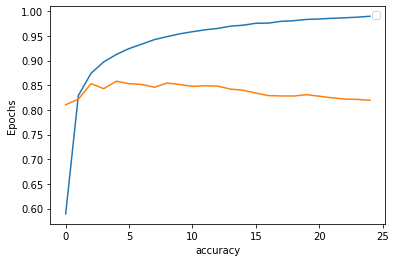

<ipython-input-235-01799f8a869e>:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(s

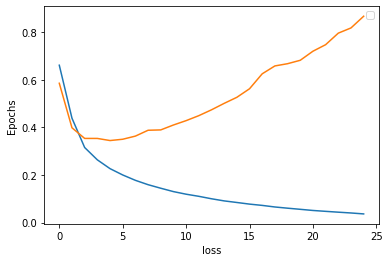

In [235]:
import matplotlib.pyplot as plt

def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.ylabel("Epochs")
  plt.xlabel(string)
  plt.legend(string, 'val_'+string)
  plt.show()


plot_graph(history,'accuracy')
plot_graph(history,'loss')  

In [236]:
#Adding Dropout

In [237]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_new.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [238]:
history= model_new.fit(training_padded, training_label, epochs=10, validation_data=(testing_padded, testing_label), verbose=2)

Epoch 1/10
625/625 - 3s - loss: 0.6347 - accuracy: 0.6304 - val_loss: 0.4547 - val_accuracy: 0.8141 - 3s/epoch - 5ms/step
Epoch 2/10
625/625 - 3s - loss: 0.3595 - accuracy: 0.8475 - val_loss: 0.3771 - val_accuracy: 0.8271 - 3s/epoch - 4ms/step
Epoch 3/10
625/625 - 2s - loss: 0.2738 - accuracy: 0.8885 - val_loss: 0.3617 - val_accuracy: 0.8426 - 2s/epoch - 4ms/step
Epoch 4/10
625/625 - 2s - loss: 0.2275 - accuracy: 0.9098 - val_loss: 0.3561 - val_accuracy: 0.8498 - 2s/epoch - 4ms/step
Epoch 5/10
625/625 - 2s - loss: 0.1906 - accuracy: 0.9266 - val_loss: 0.3796 - val_accuracy: 0.8483 - 2s/epoch - 4ms/step
Epoch 6/10
625/625 - 2s - loss: 0.1651 - accuracy: 0.9386 - val_loss: 0.3887 - val_accuracy: 0.8459 - 2s/epoch - 4ms/step
Epoch 7/10
625/625 - 2s - loss: 0.1446 - accuracy: 0.9464 - val_loss: 0.4047 - val_accuracy: 0.8506 - 2s/epoch - 4ms/step
Epoch 8/10
625/625 - 2s - loss: 0.1284 - accuracy: 0.9535 - val_loss: 0.4854 - val_accuracy: 0.8287 - 2s/epoch - 4ms/step
Epoch 9/10
625/625 - 2s 

<ipython-input-235-01799f8a869e>:8: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(s

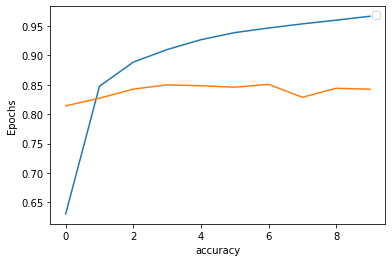

<ipython-input-235-01799f8a869e>:8: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(string, 'val_'+string)
<ipython-input-235-01799f8a869e>:8: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(s

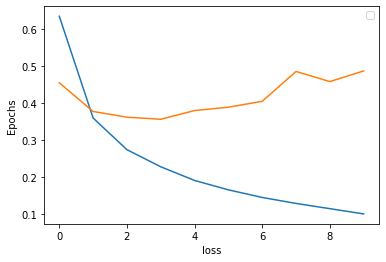

In [239]:
plot_graph(history,'accuracy')
plot_graph(history,'loss') 

In [244]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model_new.predict(padded))

1/1 [==============================] - 0s 22ms/step
[[0.93221736]
 [0.02690215]]
